# Assignment 3 : Design Problem


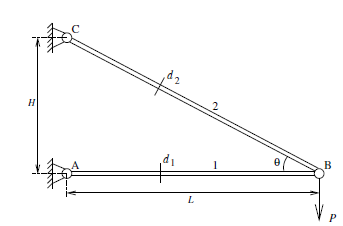        

Question a) Show that the optimization problem in negative null form can be stated as:

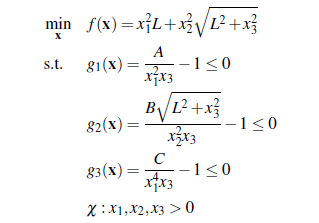      

and give expressions for A, B, and C in terms of constant parameters σy, s, L, ρ, E, and P.

Given our bar material, bar length L = 12.5 [cm], external force, and safety factor, we get: A = 100 [cm^3], B = 8 [cm^2], and C = 3000 [cm^5].

Refer: https://docs.scipy.org/doc/scipy/tutorial/optimize.html for scipy.optimize

In [9]:
# Question B and C 

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
L = 12.5
A = 100
B = 8
C = 3000

# Objective function
def objective(x):
    ##### Complete code here #####
    obj = x[0]**2 * L + x[1]**2 * np.sqrt(L**2 + x[2]**2)
    ##########
    return (obj)

# Nonlinear inequality constraints (g(x) <= 0)
def nonlinear_constraints(x):
    ##### Complete code here #####
    g1 = A / (x[0]**2 * x[2]) - 1  
    g2 = B * np.sqrt(L**2 + x[2]**2) / (x[1]**2 * x[2]) - 1  
    g3 = C / (x[0]**4 * x[2]) - 1  
    ##########
    return np.array([g1, g2, g3])

# Bounds (x1, x2, x3 > 0)
bounds = [(1e-6, None), (1e-6, None), (1e-6, None)]

# Initial guess 
x0 = np.array([3, 3, 3])

# Constraints dictionary
constraints = [
    {'type': 'ineq', 'fun': lambda x: -nonlinear_constraints(x)[0]},  
    {'type': 'ineq', 'fun': lambda x: -nonlinear_constraints(x)[1]},  
    {'type': 'ineq', 'fun': lambda x: -nonlinear_constraints(x)[2]}   
]

# Solve the optimization problem
result = minimize(
    objective, x0, 
    method='SLSQP', 
    constraints=constraints, 
    bounds=bounds
)

# Results
print("Optimal solution:", result.x)
print("Objective value:", result.fun)
print("Success:", result.success)
print("Exit flag (status):", result.status)
print("Message:", result.message)

# Verify constraints
g = nonlinear_constraints(result.x)
print("\nConstraint values (should be <= 0):")
print("g1:", g[0])
print("g2:", g[1])
print("g3:", g[2])

# Gradient at the solution
if result.success:
    print("\nGradient at the solution:")
    print("For x[0]:", result.jac[0])  
    print("For x[1]:", result.jac[1])  
    print("For x[2]:", result.jac[2]) 
else:
    print("\nOptimization failed. Gradients are not available.")

Optimal solution: [ 3.57146141  3.10885679 18.43900178]
Objective value: 374.74481035649364
Success: True
Exit flag (status): 0
Message: Optimization terminated successfully

Constraint values (should be <= 0):
g1: -0.5748221128312649
g2: 4.6658898966711604e-11
g3: -2.1745716338728016e-11

Gradient at the solution:
For x[0]: 89.28653717041016
For x[1]: 138.50950241088867
For x[2]: 8.000003814697266


/tmp/ipykernel_2301699/1050048606.py:12: RuntimeWarning: divide by zero encountered in divide
  objSurf = np.sqrt((fval - (X1**2 * L)) / (X2**2) - L**2)
/tmp/ipykernel_2301699/1050048606.py:12: RuntimeWarning: invalid value encountered in sqrt
  objSurf = np.sqrt((fval - (X1**2 * L)) / (X2**2) - L**2)
/tmp/ipykernel_2301699/1050048606.py:16: RuntimeWarning: divide by zero encountered in divide
  g1 = A / (x1vector**2 * x[2])
/tmp/ipykernel_2301699/1050048606.py:17: RuntimeWarning: divide by zero encountered in divide
  g2 = B * np.sqrt(L**2 + x[2]**2) / (x2vector**2 * x[2])
/tmp/ipykernel_2301699/1050048606.py:18: RuntimeWarning: divide by zero encountered in divide
  g3 = C / (x1vector**4 * x[2])
/home/me/Projects/4DM20-engineering-optimization/ComputerAssignment3_python/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:177: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


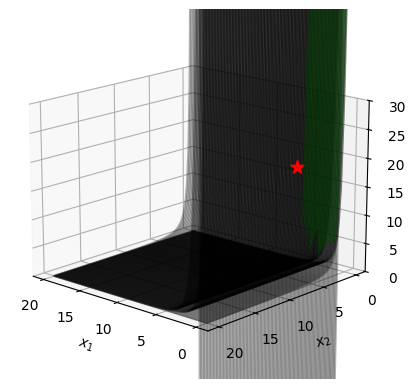

In [7]:
# Visualization

def plotNonlin3(x, fval, L, A, B, C):
    x1vector = np.arange(0, 20.2, 0.2)
    x2vector = np.arange(0, 20.2, 0.2)
    x1vectorObj = np.arange(0, 5.2, 0.2)

    vecSize = len(x1vector)
    vecSizeObj = len(x1vectorObj)

    X1, X2 = np.meshgrid(x1vectorObj, x1vectorObj)
    objSurf = np.sqrt((fval - (X1**2 * L)) / (X2**2) - L**2)
    objSurf = np.real(objSurf)
    objSurf[objSurf == 0] = -0.5  

    g1 = A / (x1vector**2 * x[2])
    g2 = B * np.sqrt(L**2 + x[2]**2) / (x2vector**2 * x[2])
    g3 = C / (x1vector**4 * x[2])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X1, X2, objSurf, color=[0, 0.7, 0], edgecolor='none', alpha=0.5)

    for x2_val in x2vector:
        ax.plot(x1vector, np.full_like(x1vector, x2_val), g1, color='k', alpha=0.3)
    for x1_val in x1vector:
        ax.plot(np.full_like(x2vector, x1_val), x2vector, g2, color='k', alpha=0.3)
    for x2_val in x2vector:
        ax.plot(x1vector, np.full_like(x1vector, x2_val), g3, color='k', alpha=0.3)

    ax.scatter(x[0], x[1], x[2], color='r', marker='*', s=100)

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    ax.set_zlim([0, 30])
    ax.view_init(elev=16, azim=132.4)

    plt.show()

plotNonlin3(result.x, result.fun, L, A, B, C)


In [11]:
# Question D

import numpy as np
from scipy.optimize import minimize

L = 12.5
A = 100
B = 8
C = 3000

# Objective function
def func3D(x, L):
    f = x[0]**2 * L + x[1]**2 * np.sqrt(L**2 + x[2]**2)
    return f

# Gradient of objective function
def grad_func3D(x, L):
    gradf = np.array([
        2 * x[0] * L,
        2 * x[1] * np.sqrt(L**2 + x[2]**2),
        (x[1]**2 * x[2]) / np.sqrt(L**2 + x[2]**2)
    ])
    return gradf

# Define Constraints
def constr3D(x, L, A, B, C):
    g = np.array([
        A / (x[0]**2 * x[2]) - 1,
        B * np.sqrt(L**2 + x[2]**2) / (x[1]**2 * x[2]) - 1,
        C / (x[0]**4 * x[2]) - 1
    ])
    h = np.array([])  
    return g, h

# Gradient of constraints
def grad_constr3D(x, L, A, B, C):
    gradg = np.array([
        [-2 * A / (x[0]**3 * x[2]), 0, -A / (x[0]**2 * x[2]**2)],
        [0, -2 * B * np.sqrt(L**2 + x[2]**2) / (x[1]**3 * x[2]), -B * L**2 / (x[1]**2 * x[2]**2 * np.sqrt(L**2 + x[2]**2))],
        [-4 * C / (x[0]**5 * x[2]), 0, -C / (x[0]**4 * x[2]**2)]
    ])
    gradh = np.array([])  
    return gradg, gradh

def constraints(x):
    g, h = constr3D(x, L, A, B, C)
    gradg, gradh = grad_constr3D(x, L, A, B, C)
    return {
        'type': 'ineq',
        'fun': lambda x: -constr3D(x, L, A, B, C)[0],  # Negative because scipy uses g(x) >= 0
        'jac': lambda x: -grad_constr3D(x, L, A, B, C)[0]  
    }

def objective(x):
    return func3D(x, L), grad_func3D(x, L)

# Initial Guess
x0 = np.array([1, 1, 1])

# Lower and upper bounds
bounds = [(1e-10, None), (1e-10, None), (1e-10, None)]

cons = constraints(x0)

# Play with solvers and options
result = minimize(
    objective, x0, 
    method='SLSQP', 
    jac=True, 
    bounds=bounds,
    constraints=cons,
    options={'disp': True}
)

# Display results
print("Optimal solution (x):", result.x)
print("Objective value at solution:", result.fun)
print("Exit flag:", result.status)
print("Output:", result.message)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 374.7448103303991
            Iterations: 17
            Function evaluations: 20
            Gradient evaluations: 17
Optimal solution (x): [ 3.57146225  3.10885725 18.4389845 ]
Objective value at solution: 374.7448103303991
Exit flag: 0
Output: Optimization terminated successfully


Question e)

Verify whether the calculated optimum solution satisfies the KKT conditions using the computed Lagrange multiplier value(s). (refer to lecture Conditions for Optimality. NOTE: you do not need to re-calculate the Langrange multiplier values yourself.)

Question f)

Comment on the solution you have obtained; do you trust it and why?

In [12]:
# Question G - Increase the solution accuracy to 10^−8, and increase the maximum allowed number of function evaluations.

import numpy as np
from scipy.optimize import minimize

# Constants
L = 12.5
A = 100
B = 8
C = 3000

def func3D(x, L):
    f = x[0]**2 * L + x[1]**2 * np.sqrt(L**2 + x[2]**2)
    return f

def grad_func3D(x, L):
    gradf = np.array([
        2 * x[0] * L,
        2 * x[1] * np.sqrt(L**2 + x[2]**2),
        (x[1]**2 * x[2]) / np.sqrt(L**2 + x[2]**2)
    ])
    return gradf

def constr3D(x, L, A, B, C):
    g = np.array([
        A / (x[0]**2 * x[2]) - 1,
        B * np.sqrt(L**2 + x[2]**2) / (x[1]**2 * x[2]) - 1,
        C / (x[0]**4 * x[2]) - 1
    ])
    h = np.array([])  
    return g, h

def grad_constr3D(x, L, A, B, C):
    gradg = np.array([
        [-2 * A / (x[0]**3 * x[2]), 0, -A / (x[0]**2 * x[2]**2)],
        [0, -2 * B * np.sqrt(L**2 + x[2]**2) / (x[1]**3 * x[2]), -B * L**2 / (x[1]**2 * x[2]**2 * np.sqrt(L**2 + x[2]**2))],
        [-4 * C / (x[0]**5 * x[2]), 0, -C / (x[0]**4 * x[2]**2)]
    ])
    gradh = np.array([])  
    return gradg, gradh

def constraints(x):
    g, h = constr3D(x, L, A, B, C)
    gradg, gradh = grad_constr3D(x, L, A, B, C)
    return {
        'type': 'ineq',
        'fun': lambda x: -constr3D(x, L, A, B, C)[0],  # Negative because scipy uses g(x) >= 0
        'jac': lambda x: -grad_constr3D(x, L, A, B, C)[0]  
    }

def objective(x):
    return func3D(x, L), grad_func3D(x, L)

x0 = np.array([1, 1, 1])

bounds = [(1e-10, None), (1e-10, None), (1e-10, None)]

cons = constraints(x0)

# Play with solvers and options
result = minimize(
    objective, x0, 
    method='SLSQP', 
    jac=True, 
    bounds=bounds,
    constraints=cons,
    options={'disp': True, 'ftol': 1e-8, 'maxiter': 1000}
)

# Display results
print("Optimal solution (x):", result.x)
print("Objective value at solution:", result.fun)
print("Exit flag:", result.status)
print("Output:", result.message)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 374.7448103647869
            Iterations: 18
            Function evaluations: 21
            Gradient evaluations: 18
Optimal solution (x): [ 3.57146166  3.10885693 18.43899658]
Objective value at solution: 374.7448103647869
Exit flag: 0
Output: Optimization terminated successfully
